In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
general_path = 'Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock', 'unknown']


In [3]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


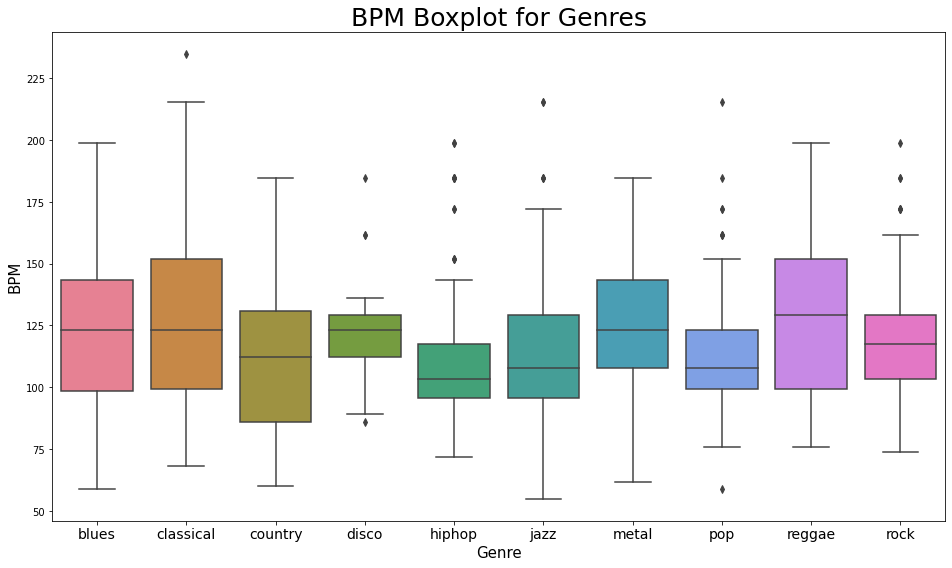

In [5]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

In [4]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

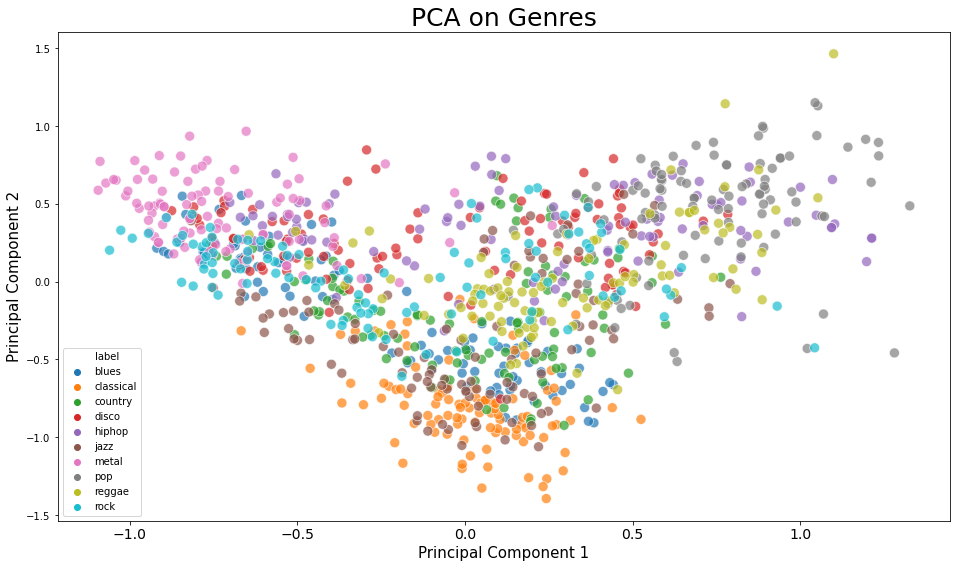

In [7]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

In [5]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [6]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


# Find optimal classification algorithm for dataset

In [7]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

# Methods

In [13]:
# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

Accuracy Stochastic Gradient Descent : 0.65532 

Accuracy KNN : 0.80581 

Accuracy Random Forest : 0.81415 

Accuracy Logistic Regression : 0.6977 

Accuracy Neural Nets : 0.67534 

[00:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Cross Gradient Booster : 0.90224 



# Final model

[00:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.90224 



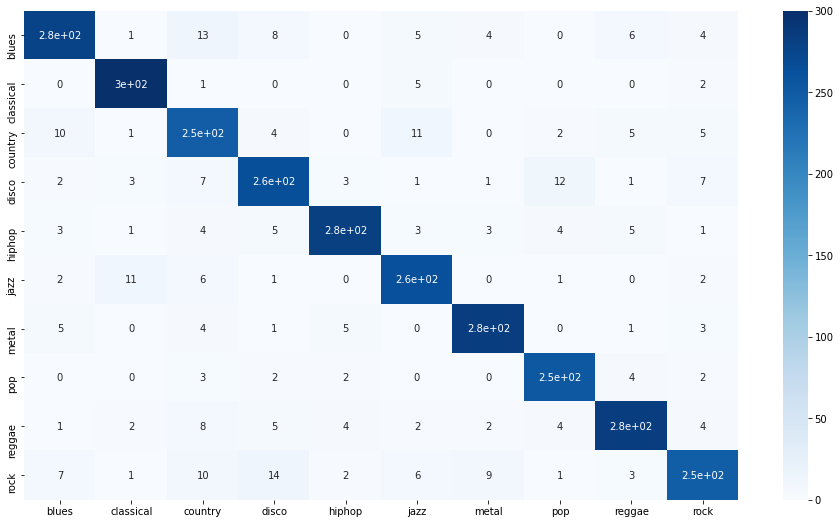

In [14]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

In [8]:
# Libraries
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Read data
data = pd.read_csv(f'{general_path}/features_30_sec.csv', index_col='filename')

# Extract labels
#labels = data[['label']]

# Drop labels from original dataframe
#data = data.drop(columns=['length','label'])
data.head()

# Scale the data
#data_scaled=preprocessing.scale(data)
#print('Scaled data type:', type(data_scaled))

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [9]:
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


# Features extraction from .wav files

In [98]:
# Importing 1 file
folder = "unknown"
filenames = ['rock.00101.wav','rock.00102.wav','pop.00101.wav','pop.00102.wav','jazz.00101.wav',
             'hiphop.00101.wav']
hop_length = 5000

unknown = pd.DataFrame(columns = ['filename','length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var','label'])


for filename in filenames:
    y, sr = librosa.load(f'{general_path}/genres_original/{folder}/{filename}')


    # Verify length of the audio
    # Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
    audio_file, _ = librosa.effects.trim(y)

    # the result is an numpy ndarray
    y_harm, y_perc = librosa.effects.hpss(audio_file)
    harmony_var=np.var(y_harm)
    harmony_mean=np.mean(y_harm)
    perceptr_var=np.var(y_perc)
    perceptr_mean=np.mean(y_perc)
    temp, _ = librosa.beat.beat_track(y, sr = sr)
    tempo=temp

    spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]
    spectral_centroids_var=np.var(spectral_centroids)
    spectral_centroids_mean=np.mean(spectral_centroids)

    spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]
    rolloff_var=np.var(spectral_rolloff)
    rolloff_mean=np.mean(spectral_rolloff)

    spectral_bandwidth = librosa.feature.spectral_bandwidth(audio_file, sr=sr)[0]
    spectral_bandwidth_var=np.var(spectral_bandwidth)
    spectral_bandwidth_mean=np.mean(spectral_bandwidth)
    rms = librosa.feature.rms(audio_file)[0]
    rms_var=np.var(rms)
    rms_mean=np.mean(rms)

    chroma_stft = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
    chroma_stft_var=np.var(chroma_stft)
    chroma_stft_mean=np.mean(chroma_stft)
    zero_crossings = librosa.zero_crossings(audio_file, pad=False)
    zero_crossing_var=np.var(zero_crossings)
    zero_crossing_mean=np.mean(zero_crossings)
    mfcc = librosa.feature.mfcc(audio_file, sr=sr)
 
    unknown = unknown.append( 
                    {'filename':filename,
                     'length':y.shape[0], 
                     'chroma_stft_mean': chroma_stft_mean, 
                     'chroma_stft_var' : chroma_stft_var, 
                     'rms_mean' : rms_mean, 'rms_var' : rms_var,
                     'spectral_centroid_mean' : spectral_centroids_mean, 
                     'spectral_centroid_var' : spectral_centroids_var,   
                     'spectral_bandwidth_mean': spectral_bandwidth_mean , 
                     'spectral_bandwidth_var': spectral_bandwidth_var, 
                     'rolloff_mean': rolloff_mean,
                     'rolloff_var': rolloff_var, 
                     'zero_crossing_rate_mean': zero_crossing_mean, 
                     'zero_crossing_rate_var': zero_crossing_var,     
                     'harmony_mean': harmony_mean, 
                     'harmony_var': harmony_var, 
                     'perceptr_mean': perceptr_mean, 
                     'perceptr_var': perceptr_var, 
                     'tempo': tempo,
                     'mfcc1_mean': np.mean(mfcc[0]),
                     'mfcc1_var': np.var(mfcc[0]),
                     'mfcc2_mean': np.mean(mfcc[1]),
                     'mfcc2_var': np.var(mfcc[1]),
                     'mfcc3_mean':np.mean(mfcc[2]),
                     'mfcc3_var':np.var(mfcc[2]),
                     'mfcc4_mean': np.mean(mfcc[3]),
                     'mfcc4_var': np.var(mfcc[3]),
                     'mfcc5_mean': np.mean(mfcc[4]),
                     'mfcc5_var':np.var(mfcc[4]),
       
                     'mfcc6_mean': np.mean(mfcc[5]),
                     'mfcc6_var': np.var(mfcc[5]),
                     'mfcc7_mean': np.mean(mfcc[6]),
                     'mfcc7_var': np.var(mfcc[6]),
                     'mfcc8_mean':np.mean(mfcc[7]),
       
                     'mfcc8_var': np.var(mfcc[7]),
                     'mfcc9_mean': np.mean(mfcc[8]),
                     'mfcc9_var': np.var(mfcc[8]),
                     'mfcc10_mean': np.mean(mfcc[9]),
                     'mfcc10_var': np.var(mfcc[9]),
                     'mfcc11_mean': np.mean(mfcc[10]),
                     'mfcc11_var': np.var(mfcc[10]),
                     'mfcc12_mean':np.mean(mfcc[11]),
                     'mfcc12_var':np.var(mfcc[11]),
                     'mfcc13_mean': np.mean(mfcc[12]),
                     'mfcc13_var': np.var(mfcc[12]),
                     'mfcc14_mean': np.mean(mfcc[13]),
                     'mfcc14_var':np.var(mfcc[13]),
                     
                     'mfcc15_mean':np.mean(mfcc[14]),
                    'mfcc15_var':np.var(mfcc[14]),
                    'mfcc16_mean':np.mean(mfcc[15]),
                    'mfcc16_var':np.var(mfcc[15]),
                    'mfcc17_mean':np.mean(mfcc[16]),
                    'mfcc17_var':np.var(mfcc[16]),
                    'mfcc18_mean':np.mean(mfcc[17]),
                    'mfcc18_var':np.var(mfcc[17]),
                    'mfcc19_mean':np.mean(mfcc[18]),
                    'mfcc19_var':np.var(mfcc[18]),
                    'mfcc20_mean':np.mean(mfcc[19]),
                    'mfcc20_var':np.var(mfcc[19]),
                     'label': 'unknown'
                    }, ignore_index=True)
unknown = unknown.set_index('filename')    

In [99]:
unknown.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
rock.00101.wav,673187,0.371103,0.083862,0.136398,0.000631,2933.455439,392683.691595,2708.217925,75482.692070,6041.250668,...,44.453262,-3.877922,33.039955,3.136460,27.841267,-6.682186,33.152142,-4.158246,29.299435,unknown
rock.00102.wav,662016,0.306796,0.090798,0.128406,0.002372,2388.612309,558527.029802,2443.152762,216939.456612,4865.031195,...,48.968307,-7.916690,71.598724,-0.550435,74.292580,-9.354719,94.977448,-12.645847,83.002525,unknown
pop.00101.wav,663040,0.338275,0.089469,0.250809,0.003367,2326.470349,271814.404571,2620.578676,112941.074467,5269.819472,...,43.043510,3.359453,90.699966,0.104214,74.803299,-4.840611,68.760246,6.734792,79.410751,unknown
pop.00102.wav,572416,0.487226,0.077556,0.239650,0.006124,2485.370144,454369.283049,2852.617065,147626.564744,5826.386365,...,27.885101,-0.043578,24.070808,3.550274,23.494747,-2.107594,30.903778,-0.004839,31.135138,unknown
jazz.00101.wav,662331,0.356897,0.089349,0.170649,0.003908,2187.542058,314577.758268,2586.252596,71355.700660,5149.322727,...,50.798515,-0.391632,43.728565,-8.961026,33.792717,0.880591,32.011532,-9.568656,51.287796,unknown


In [100]:
# concat 2 dataframes

frames = [data, unknown]
result = pd.concat(frames)

# Extract labels
labels = result[['label']]



# Drop labels from concat dataframe
result = result.drop(columns=['length','label'])

# Scale the data
result_scaled=preprocessing.scale(result)


In [101]:
# Cosine similarity
similarity = cosine_similarity(result_scaled)
print("Similarity shape:", similarity.shape)

# Convert into a dataframe and then set the row index and column names as labels
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.columns

Similarity shape: (1006, 1006)


Index(['blues.00000.wav', 'blues.00001.wav', 'blues.00002.wav',
       'blues.00003.wav', 'blues.00004.wav', 'blues.00005.wav',
       'blues.00006.wav', 'blues.00007.wav', 'blues.00008.wav',
       'blues.00009.wav',
       ...
       'rock.00096.wav', 'rock.00097.wav', 'rock.00098.wav', 'rock.00099.wav',
       'rock.00101.wav', 'rock.00102.wav', 'pop.00101.wav', 'pop.00102.wav',
       'jazz.00101.wav', 'hiphop.00101.wav'],
      dtype='object', name='filename', length=1006)

In [102]:
def find_similar_songs(name):
    # Find songs most similar to another song
    series = sim_df_names[name].sort_values(ascending = False)
    
    # Remove cosine similarity == 1 (songs will always have the best match with themselves)
    series = series.drop(name)
    
    # Display the 5 top matches 
    print("\n*******\nSimilar songs to ", name)
    print(series.head(15))

# similarity dataset songs

In [53]:
find_similar_songs('rock.00087.wav') 


*******
Similar songs to  rock.00087.wav
filename
rock.00017.wav     0.938627
rock.00026.wav     0.935821
metal.00072.wav    0.921303
metal.00058.wav    0.912528
rock.00016.wav     0.912528
metal.00027.wav    0.896231
metal.00028.wav    0.891292
rock.00018.wav     0.888682
rock.00094.wav     0.886349
rock.00020.wav     0.863823
metal.00046.wav    0.859961
metal.00011.wav    0.859483
rock.00079.wav     0.857638
rock.00091.wav     0.853122
metal.00059.wav    0.849425
Name: rock.00087.wav, dtype: float64


In [135]:
find_similar_songs('rock.00006.wav') 


*******
Similar songs to  rock.00006.wav
filename
country.00072.wav    0.636475
country.00070.wav    0.602471
blues.00080.wav      0.601205
country.00094.wav    0.599972
rock.00005.wav       0.591400
country.00093.wav    0.589278
country.00077.wav    0.579163
country.00084.wav    0.578370
blues.00057.wav      0.558337
blues.00004.wav      0.551063
blues.00002.wav      0.546387
country.00073.wav    0.543932
country.00098.wav    0.543344
metal.00092.wav      0.532860
rock.00007.wav       0.521440
Name: rock.00006.wav, dtype: float64


In [107]:
find_similar_songs('metal.00001.wav') 


*******
Similar songs to  metal.00001.wav
filename
metal.00007.wav     0.848102
metal.00013.wav     0.830848
metal.00036.wav     0.823390
disco.00051.wav     0.798433
metal.00054.wav     0.796630
metal.00049.wav     0.795516
metal.00040.wav     0.795056
metal.00061.wav     0.795056
metal.00004.wav     0.784919
disco.00070.wav     0.783698
metal.00046.wav     0.780777
hiphop.00095.wav    0.772731
metal.00048.wav     0.770697
disco.00050.wav     0.766085
metal.00012.wav     0.765186
Name: metal.00001.wav, dtype: float64


# similarity for our songs

In [104]:
find_similar_songs('pop.00102.wav') 


*******
Similar songs to  pop.00102.wav
filename
hiphop.00101.wav     0.865385
pop.00101.wav        0.855099
rock.00101.wav       0.843881
jazz.00101.wav       0.771166
rock.00102.wav       0.680278
disco.00028.wav      0.521003
pop.00069.wav        0.507387
pop.00082.wav        0.502497
pop.00043.wav        0.487510
pop.00004.wav        0.486557
pop.00021.wav        0.485588
country.00007.wav    0.475124
disco.00003.wav      0.458256
country.00009.wav    0.454685
pop.00035.wav        0.449301
Name: pop.00102.wav, dtype: float64


In [103]:
find_similar_songs('pop.00101.wav') 


*******
Similar songs to  pop.00101.wav
filename
hiphop.00101.wav     0.879236
rock.00101.wav       0.860479
pop.00102.wav        0.855099
rock.00102.wav       0.779560
jazz.00101.wav       0.764005
pop.00020.wav        0.348909
pop.00036.wav        0.343242
country.00000.wav    0.337800
country.00008.wav    0.335976
pop.00035.wav        0.332886
pop.00039.wav        0.328919
pop.00073.wav        0.322698
pop.00038.wav        0.316790
disco.00028.wav      0.310951
pop.00042.wav        0.304599
Name: pop.00101.wav, dtype: float64


In [105]:
find_similar_songs('rock.00101.wav') 


*******
Similar songs to  rock.00101.wav
filename
rock.00102.wav       0.870496
jazz.00101.wav       0.860767
pop.00101.wav        0.860479
hiphop.00101.wav     0.856227
pop.00102.wav        0.843881
disco.00028.wav      0.361072
jazz.00082.wav       0.339327
disco.00022.wav      0.294655
pop.00032.wav        0.294167
reggae.00051.wav     0.292405
disco.00035.wav      0.255427
disco.00030.wav      0.244599
country.00014.wav    0.240230
jazz.00083.wav       0.238527
rock.00057.wav       0.237661
Name: rock.00101.wav, dtype: float64


In [106]:
find_similar_songs('rock.00102.wav') 


*******
Similar songs to  rock.00102.wav
filename
rock.00101.wav      0.870496
hiphop.00101.wav    0.792543
pop.00101.wav       0.779560
jazz.00101.wav      0.767190
pop.00102.wav       0.680278
pop.00032.wav       0.312522
jazz.00091.wav      0.284450
hiphop.00040.wav    0.278012
pop.00084.wav       0.270921
hiphop.00079.wav    0.264661
pop.00055.wav       0.263286
hiphop.00045.wav    0.258837
hiphop.00039.wav    0.258837
reggae.00051.wav    0.252089
hiphop.00075.wav    0.251285
Name: rock.00102.wav, dtype: float64


In [108]:
find_similar_songs('hiphop.00101.wav')


*******
Similar songs to  hiphop.00101.wav
filename
pop.00101.wav       0.879236
pop.00102.wav       0.865385
rock.00101.wav      0.856227
rock.00102.wav      0.792543
jazz.00101.wav      0.783779
pop.00097.wav       0.495872
pop.00059.wav       0.489699
pop.00056.wav       0.487987
reggae.00051.wav    0.484705
pop.00071.wav       0.471532
pop.00067.wav       0.471532
hiphop.00047.wav    0.466251
hiphop.00071.wav    0.458713
pop.00051.wav       0.454205
pop.00032.wav       0.453447
Name: hiphop.00101.wav, dtype: float64


In [110]:
find_similar_songs('jazz.00101.wav')


*******
Similar songs to  jazz.00101.wav
filename
rock.00101.wav      0.860767
hiphop.00101.wav    0.783779
pop.00102.wav       0.771166
rock.00102.wav      0.767190
pop.00101.wav       0.764005
disco.00030.wav     0.361015
reggae.00095.wav    0.350406
disco.00011.wav     0.350130
disco.00022.wav     0.349047
disco.00028.wav     0.343259
jazz.00073.wav      0.339266
jazz.00082.wav      0.329060
jazz.00075.wav      0.325660
reggae.00049.wav    0.318854
rock.00040.wav      0.315307
Name: jazz.00101.wav, dtype: float64
